<a href="https://colab.research.google.com/github/StacyChebet/Compiler-Construction-Running-File/blob/master/Compiler_Construction_Running_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Group Members**
103722, 120690, 122289, 121787 ,115059

## **Lab Activity 1: Flex, Bison, Lex, Yacc**


### **Flex(Fast Lexical Analyzer Generator):**

It is a computer program that is used for generating lexical analyzers which are used to perform pattern-matching in text. Flex automates the conversion of RE to NFA and NFA to DFA.

It happens to be more flexible than Lex and Yacc and it produces faster code.

Flex is made up of 3 sections: the definition section which contains the declaration of variables, regular definitions and manifest constants, the rules section which contains the pattern and the corresponding action and the user defined section which typically contains any valid C code.


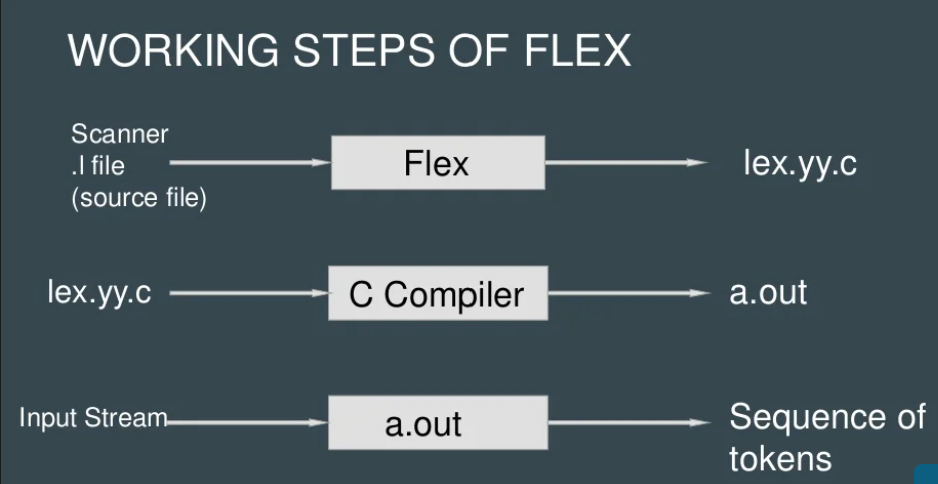

In [ ]:
# Code snippet
# Counts the number of characters and number of lines in the input
/*** Definition Section  ***/

%{
int count_lines = 0, count_chars = 0;
%}

/*** Rule Section ***/
# Rule 1:Matches any character exluding a new line.
# Rule 2: Matches a new line. 

%%
.	 ++count_chars;
\n ++count_lines; ++count_chars;

%%

/*** Code Section ***/
main()
  {
  yylex();
  printf("Number of lines = %d, Number of chars = %d\n",
         count_lines, count_chars);
  }

### **Bison**
Bison is a parser generator.

It is to parsers what flex is to scanners. You provide the input of a grammar specification and it generates an LALR(1) parser to recognize sentences in that grammar. 

Bison is an upgraded version of the older tool yacc, "yet another compiler compiler" and it is probably the most common of the LALR tools out there. 

Bison is designed for use with C code and generates a parser written in C.

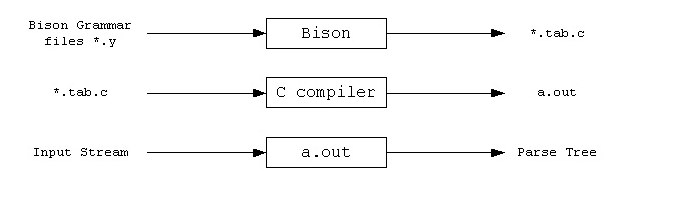

In [ ]:
%code
{
  namespace yy
  {
    // Return the next token.
    auto yylex () -> parser::symbol_type
    {
      static int count = 0;
      switch (int stage = count++)
        {
        case 0:
          return parser::make_TEXT ("I have three numbers for you.");
        case 1: case 2: case 3:
          return parser::make_NUMBER (stage);
        case 4:
          return parser::make_TEXT ("And that's all!");
        default:
          return parser::make_YYEOF ();
        }
    }
  }
}


%%
namespace yy
{
  // Report an error to the user.
  auto parser::error (const std::string& msg) -> void
  {
    std::cerr << msg << '\n';
  }
}

int main ()
{
  yy::parser parse;
  return parse ();
}

  ### **Lex**

  Lex is a program designed to generate scanners which recognize lexical patterns in text. These scanners can also be referred to as tokenizers.
  Lex was originally developed by Eric Schmidt and Mike Lesk. 

  Lex faciliates the processing of character sequences such as source code to produce symbol sequences referred to as tokens for use as input to other programs such as parsers.

  Below is a lex file that recognizes strings of numbers in the provided input and prints them out.

In [ ]:
#include <stdio.h>

%%
   
[0-9]+  {
            printf("This is an integer: %s\n", yytext);
        }

.|\n  {  }

%%

int main(void)
{
    yylex();
    return 0;
}

**NB:** The symbol **%%** marks the beginning of the rules.

### **Yacc**
#####Yacc (Yet Another Compiler Compiler) is a tool for constructing parsers. Yacc generates C code for a syntax analyzer.
#####Yacc uses grammar rules that allow it to analyze tokens from lex and create a syntax tree.
#####A syntax tree imposes a hierarchical structure on tokens. For example, operator precedence and associativity are apparent in a syntax tree. 
#####The next step, code generation, does a depth-first walk of the syntax tree to generate code, of which some compilers generate machine code while others produce assembly code.
<figure>
  <img src="https://images.slideplayer.com/26/8745488/slides/slide_4.jpg">
  <figcaption align="center">Fig.4 - How Yacc works</figcaption>
</figure>

#####**Yacc Code Snippet**
#####**Problem:** Yacc program to implement a calculator and recognize a valid arithmetic expression.


#####**Lexical Analyzer Source Code:**

In [ ]:
%{
   /* Definition section */
  #include<stdio.h>
  #include "y.tab.h"
  extern int yylval;
%}
  
/* Rule Section */
%%
[0-9]+ {
          yylval=atoi(yytext);
          return NUMBER;
  
       }
[\t] ;
  
[\n] return 0;
  
. return yytext[0];
  
%%
  
int yywrap()
{
 return 1;
}

#####**Parser Source Code:**

In [ ]:
%{
   /* Definition section */
  #include<stdio.h>
  int flag=0;
%}
  
%token NUMBER
  
%left '+' '-'
  
%left '*' '/' '%'
  
%left '(' ')'
  
/* Rule Section */
%%
  
ArithmeticExpression: E{
  
         printf("\nResult=%d\n", $$);
  
         return 0;
  
        };
 E:E'+'E {$$=$1+$3;}
  
 |E'-'E {$$=$1-$3;}
  
 |E'*'E {$$=$1*$3;}
  
 |E'/'E {$$=$1/$3;}
  
 |E'%'E {$$=$1%$3;}
  
 |'('E')' {$$=$2;}
  
 | NUMBER {$$=$1;}
  
 ;
  
%%

#####**Driver Code:**

In [ ]:
void main()
{
   printf("\nEnter Any Arithmetic Expression which 
                   can have operations Addition, 
                   Subtraction, Multiplication, Division, 
                          Modulus and Round brackets:\n");

   yyparse();
   if(flag==0)
   printf("\nEntered arithmetic expression is Valid\n\n");
}

void yyerror()
{
   printf("\nEntered arithmetic expression is Invalid\n\n");
   flag=1;
}

## **Lab Activity 2: Conversion of NFA to DFA**

**NFA (Non-Deterministic Finite Automata):**
NFAs have elements of choice/randomness meaning that one common transition could lead to different states.

**DFA (Deterministic Finite Automata):**
DFAs have explicit transitions meaning that one transition can only lead to one state hence there is no element of choice.

### **STEPS FOLLOWED TO CONVERT NFA TO DFA USING SUBSET CONSTRUCTION**

### **EXAMPLE ONE:**

The NFA shown below is the one that is to be converted to DFA:

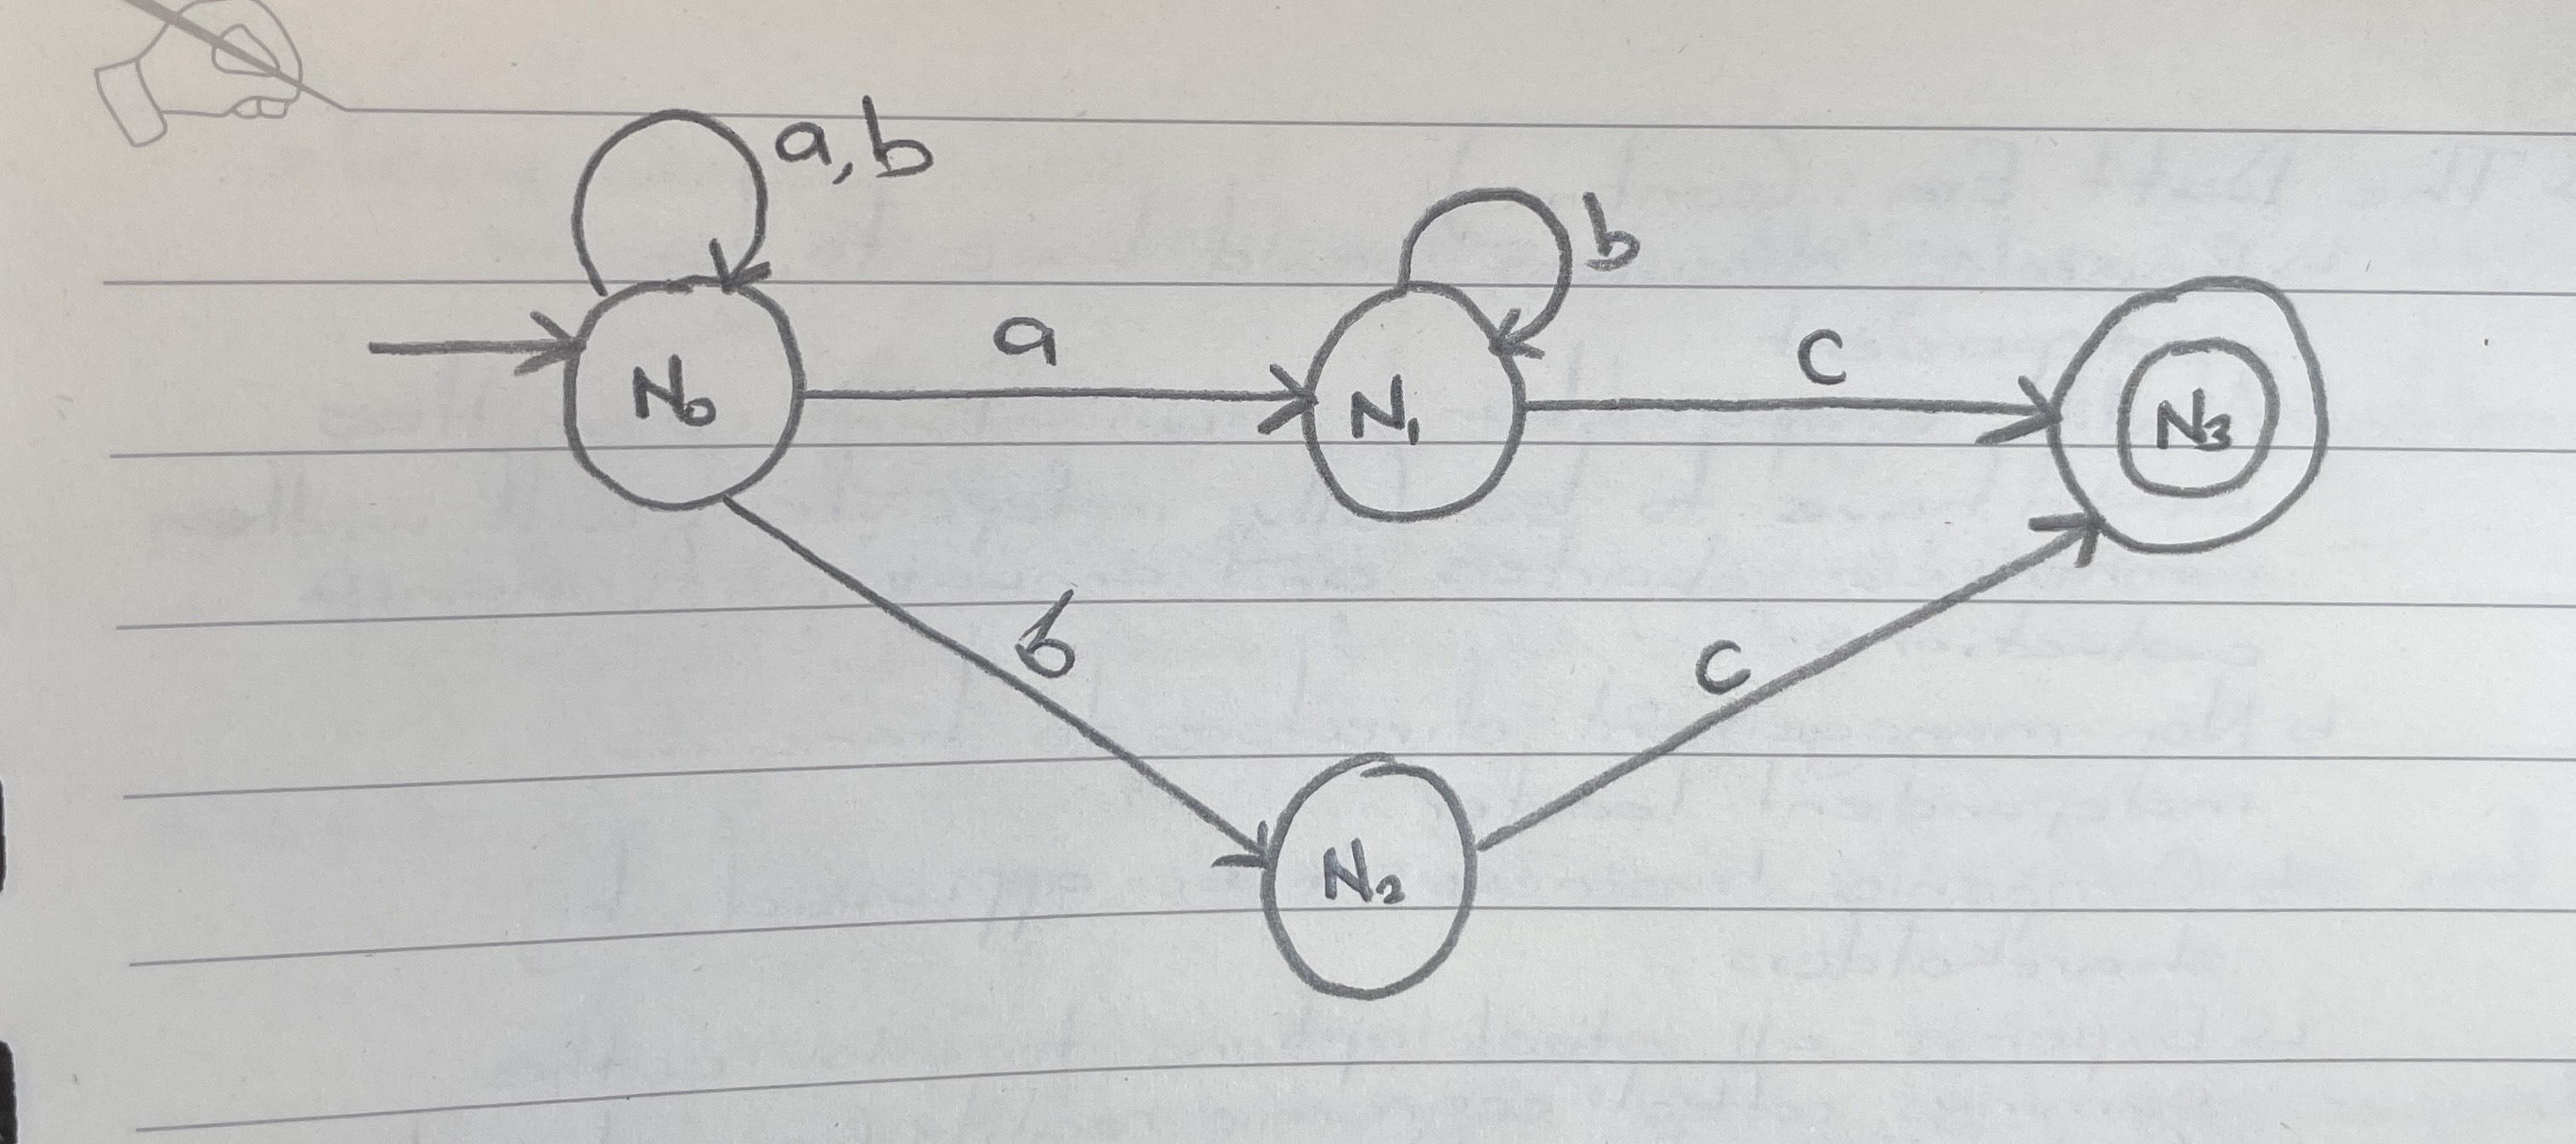

### **NFA TRANSITION TABLE:**

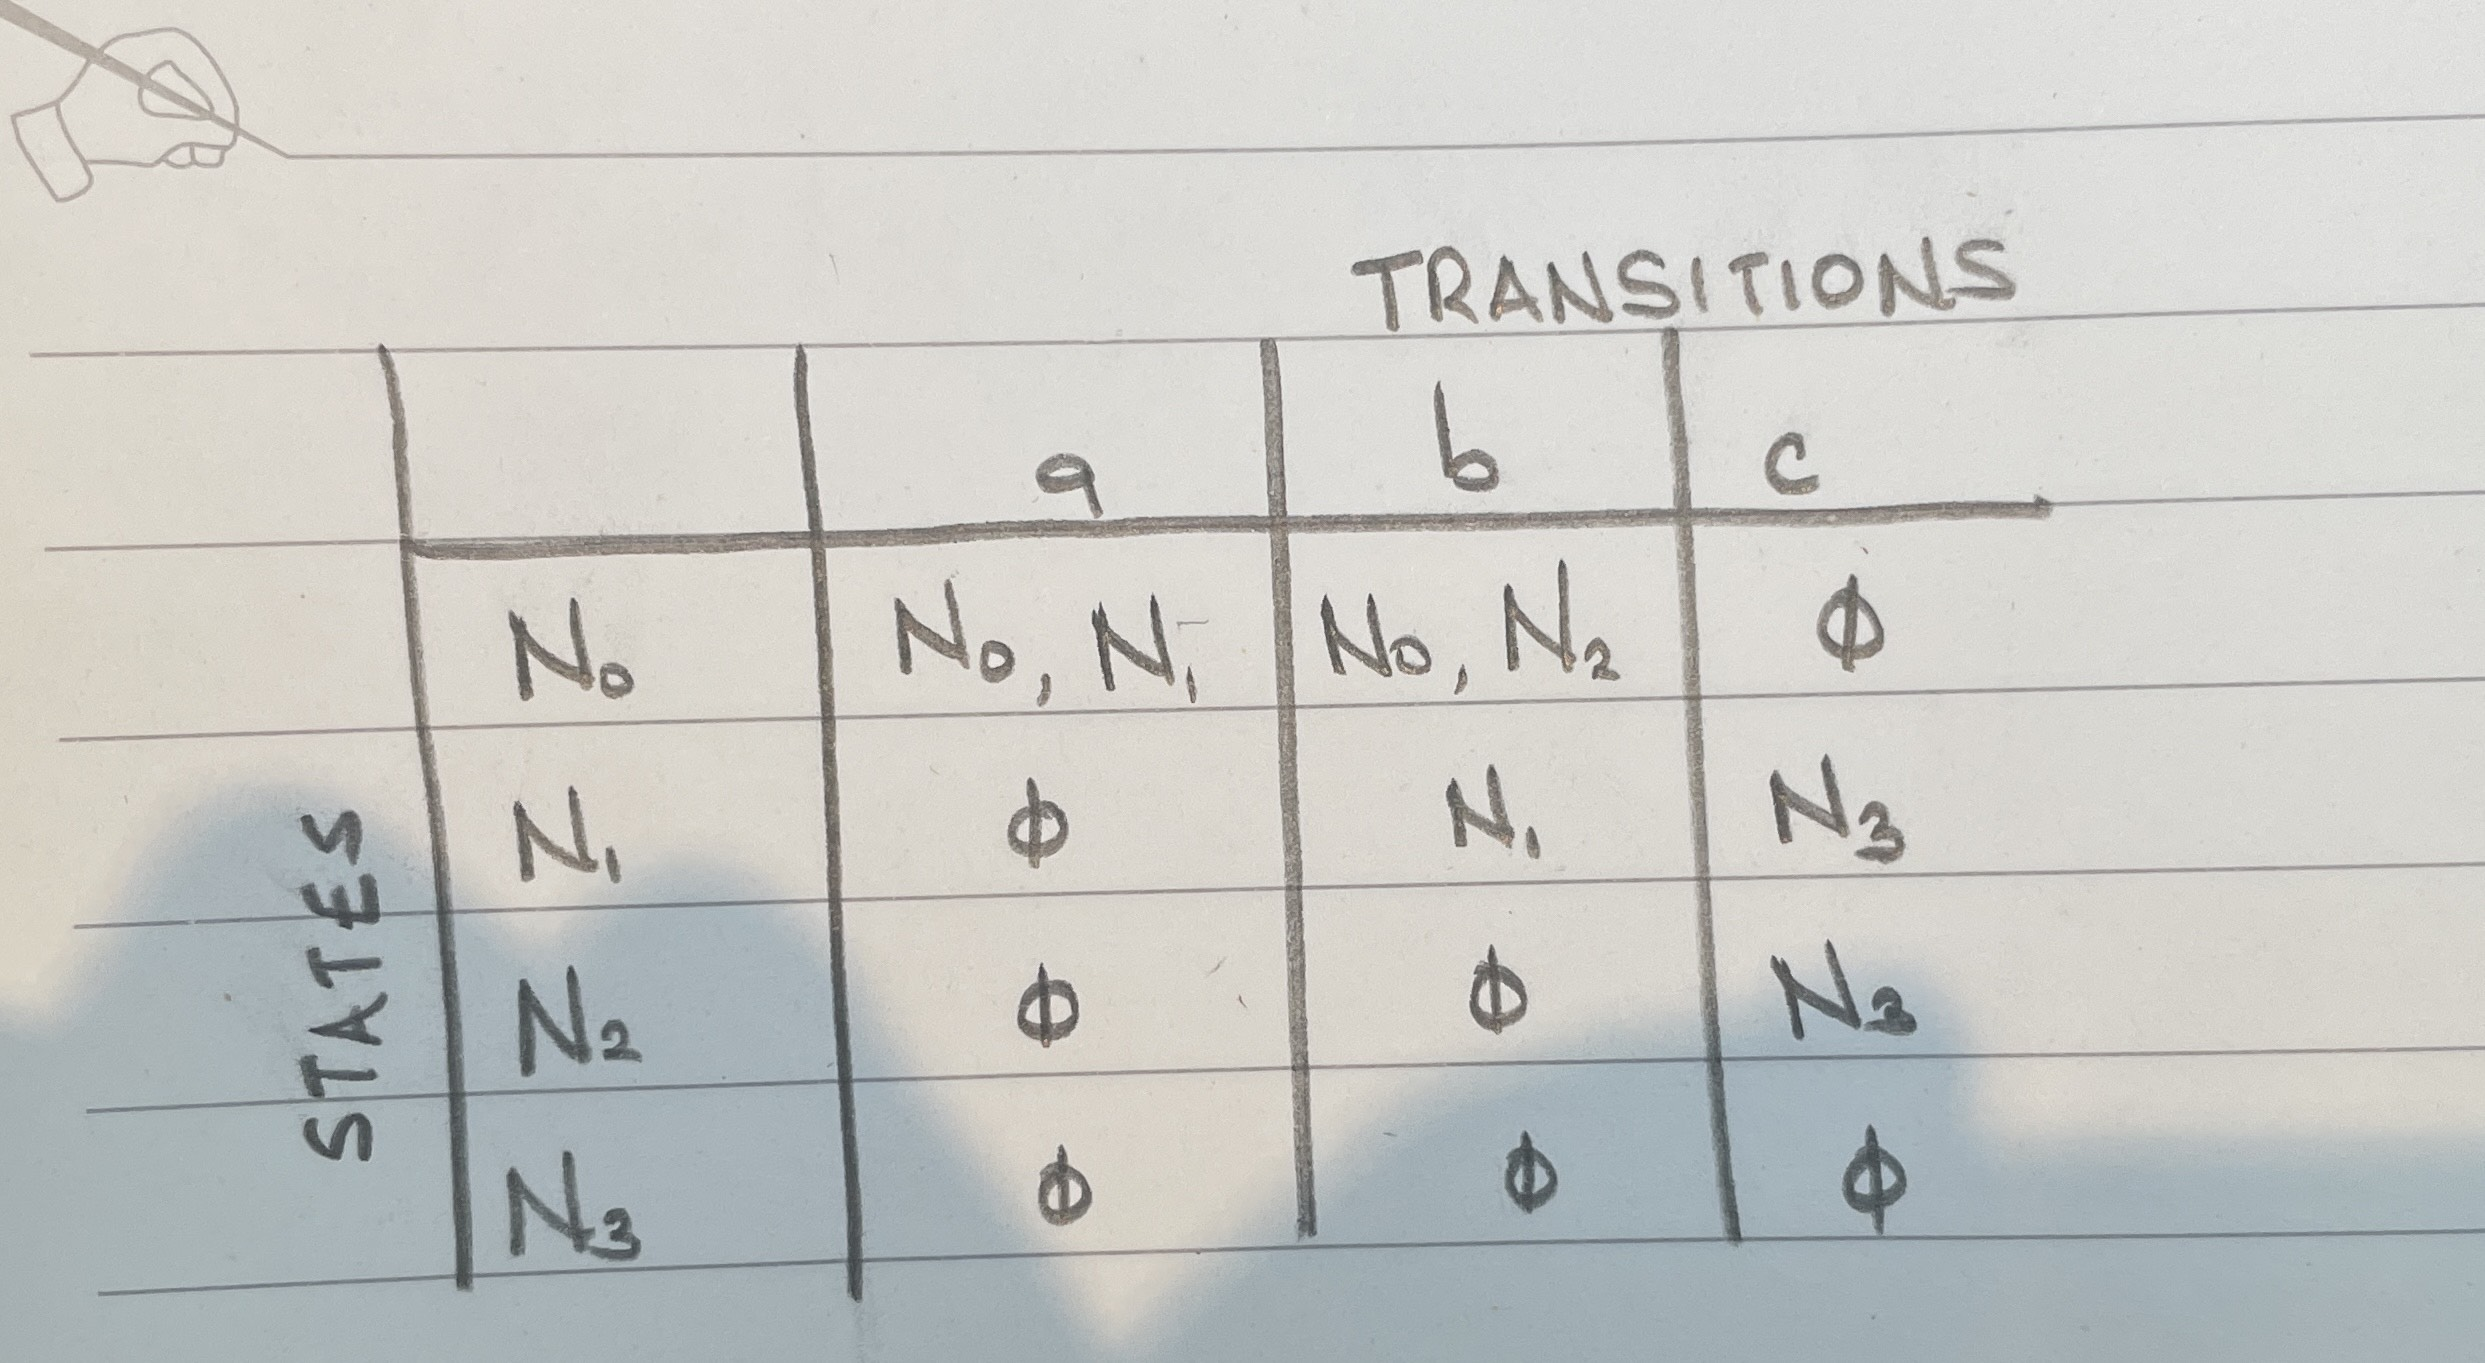

### **STEP ONE:**

*   Let S' be the new set of states of the DFA.It will be null at the beginning
*   Let T' be the new transition table for the DFA.


### **STEP TWO:**

*   The start state of the NFA becomes the start state of S'.
*   Include the transitions of the start state.

In the case where the start state transitions to multiple states, the multiple states are treated as a single state.

In the case where the start state  has a null transition, a dead/trap state (N4) is introduced. 

### **STEP THREE:**

Add transitions for the new sets of states {N0,N1} and {N0,N2} to the T'.

### **STEP FOUR:**

Add transitions for the new set of states {N0,N1,N2}

### **STEP FIVE:**

Since transition N4 is a dead state, it can only transitions to itself.
N3 is the final state hence it transitions to itself.


### **TRANSITION TABLE FOR THE NEW DFA:**

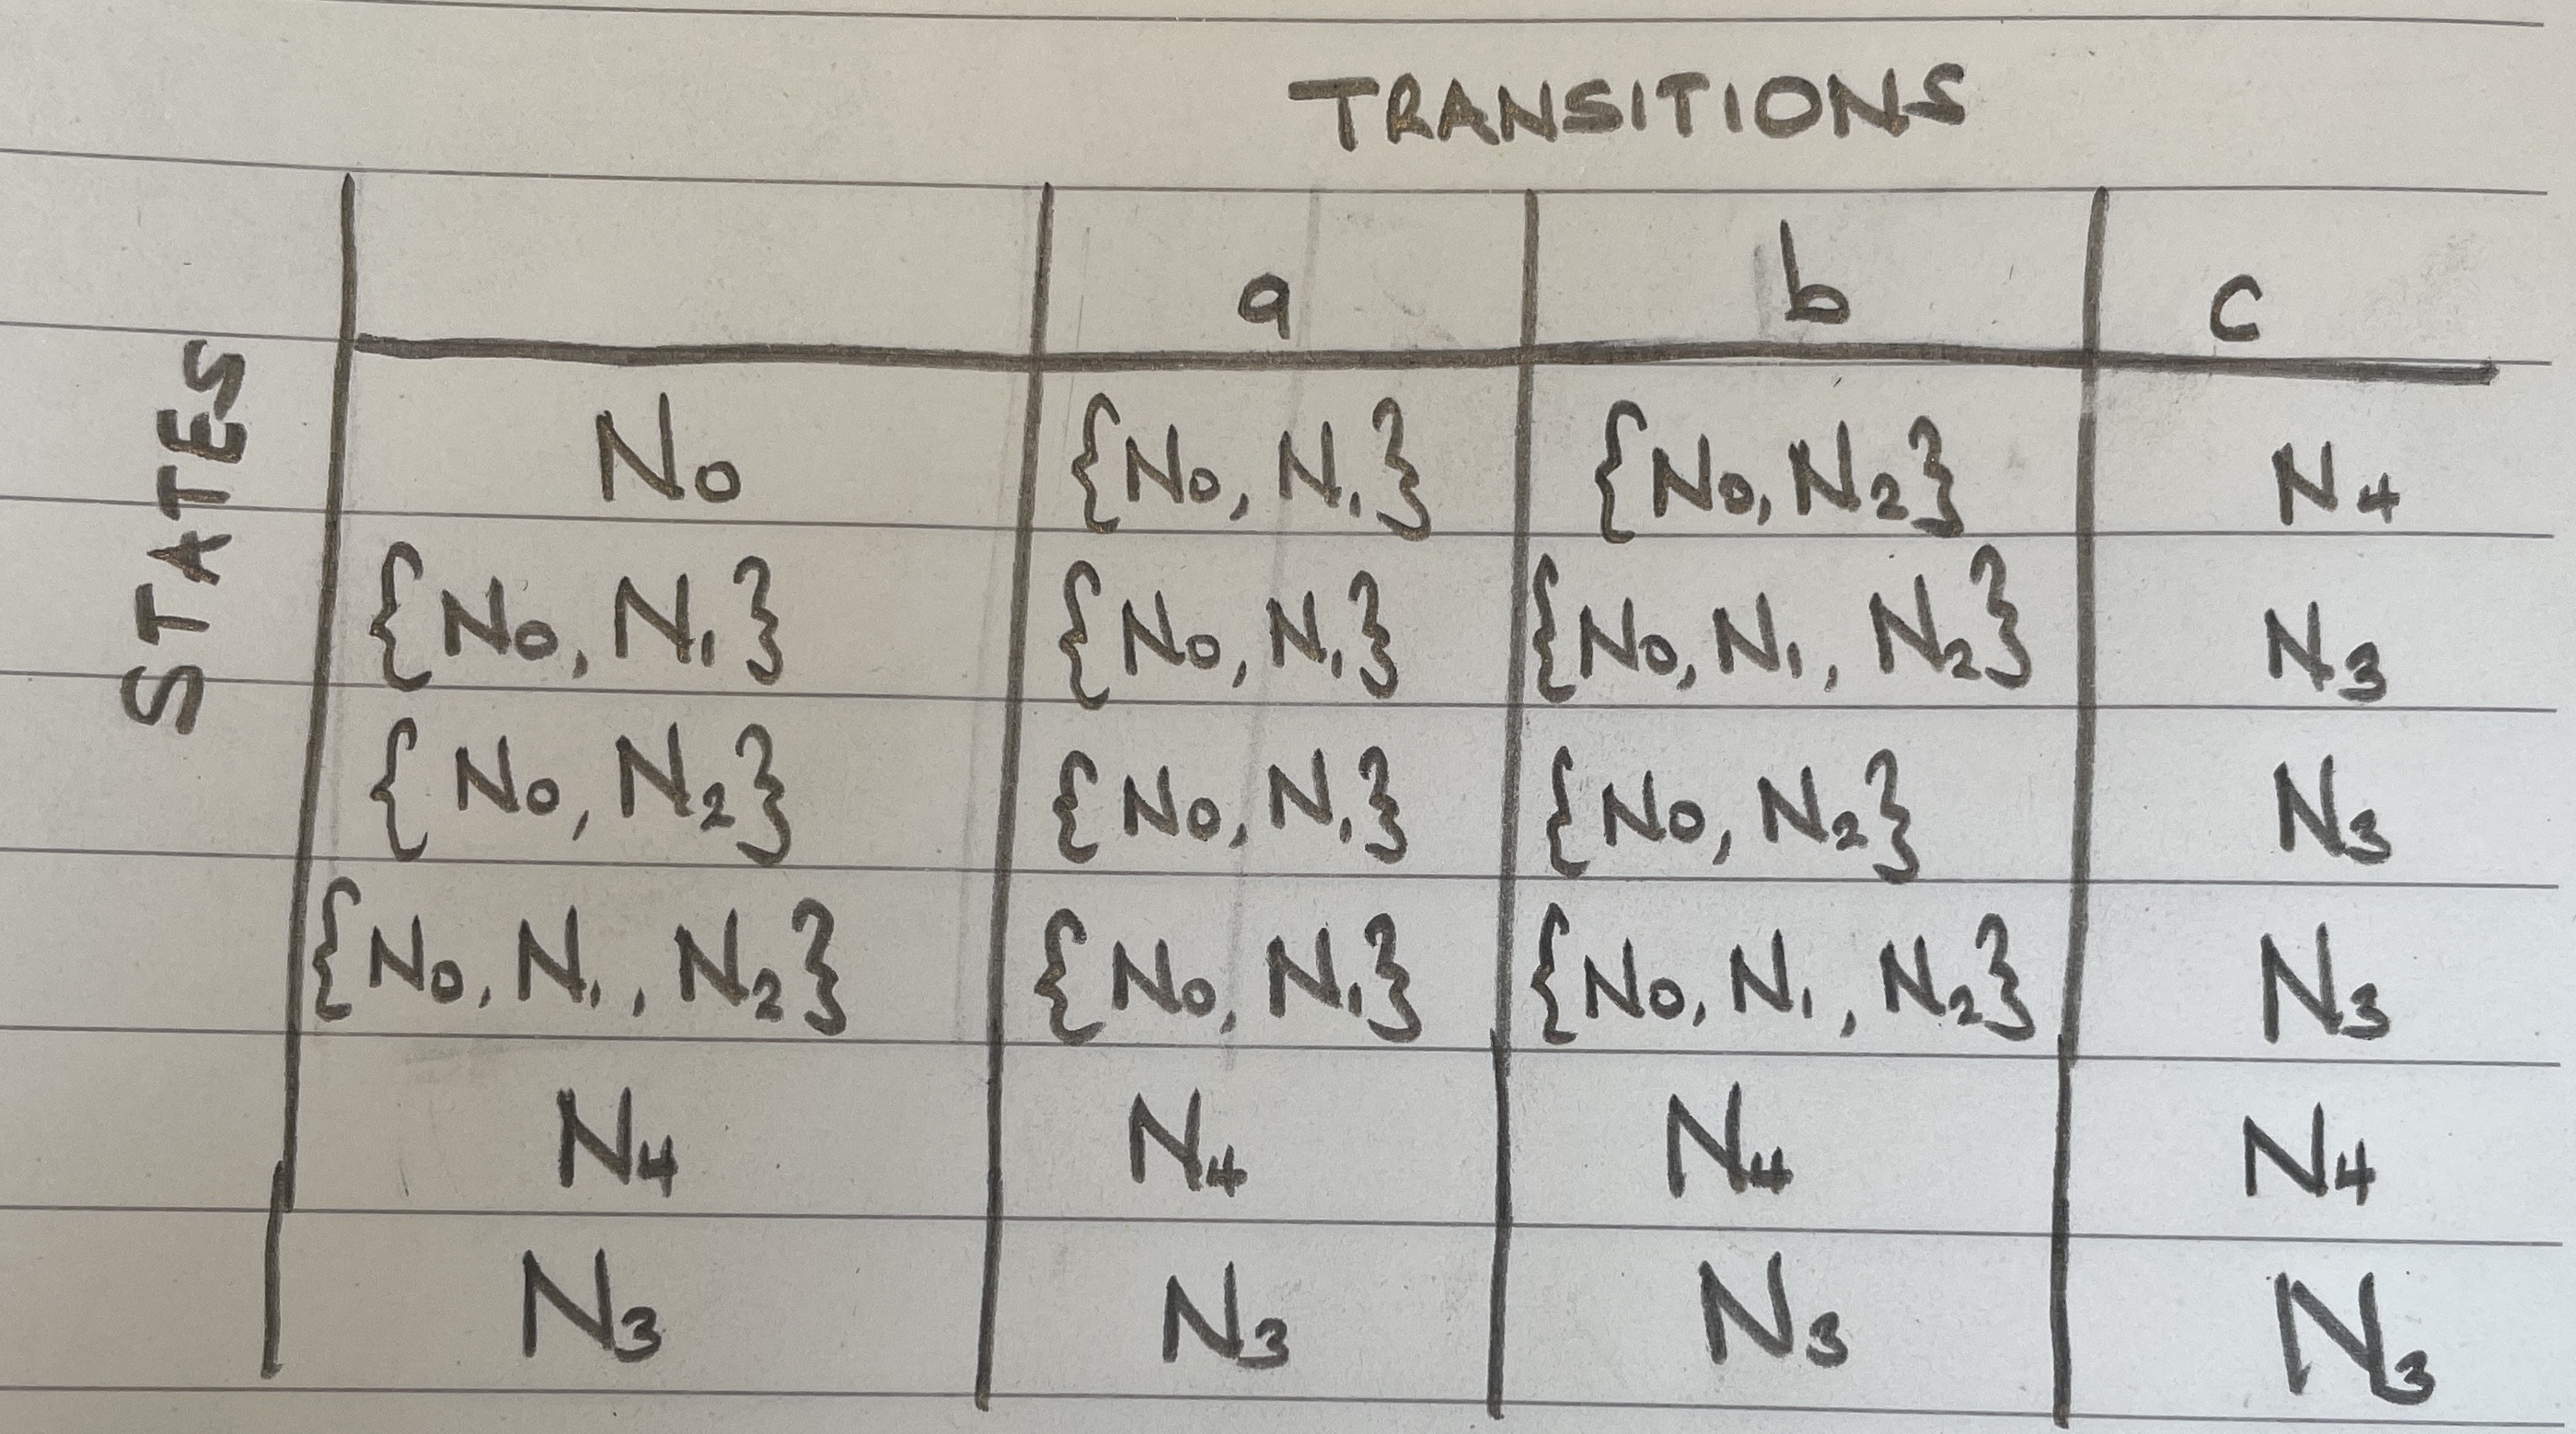

### **FINAL DFA DIAGRAM:**

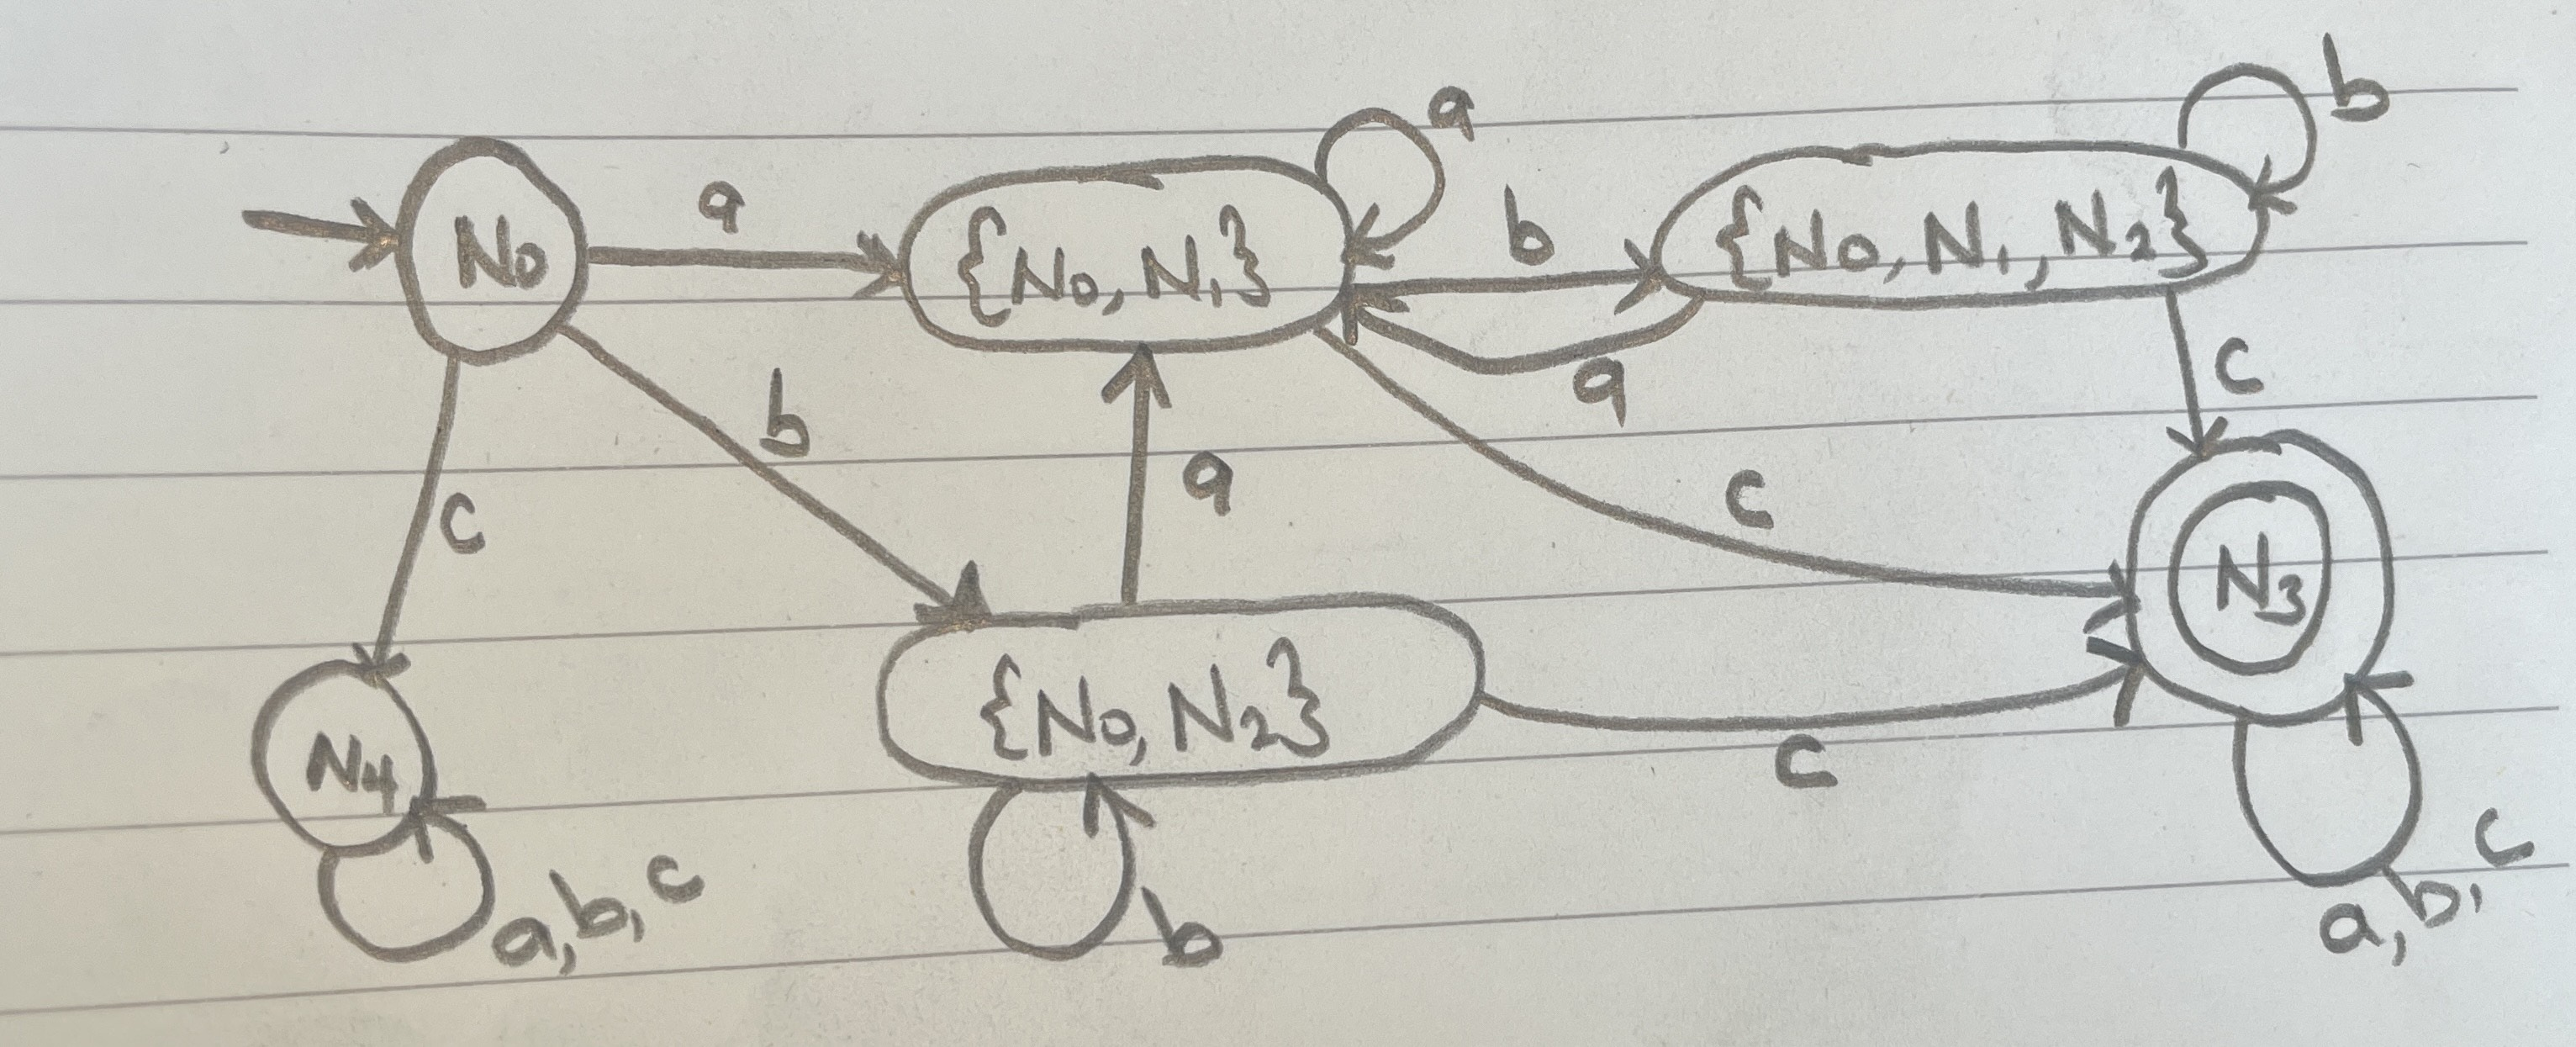

### **EXAMPLE TWO :**

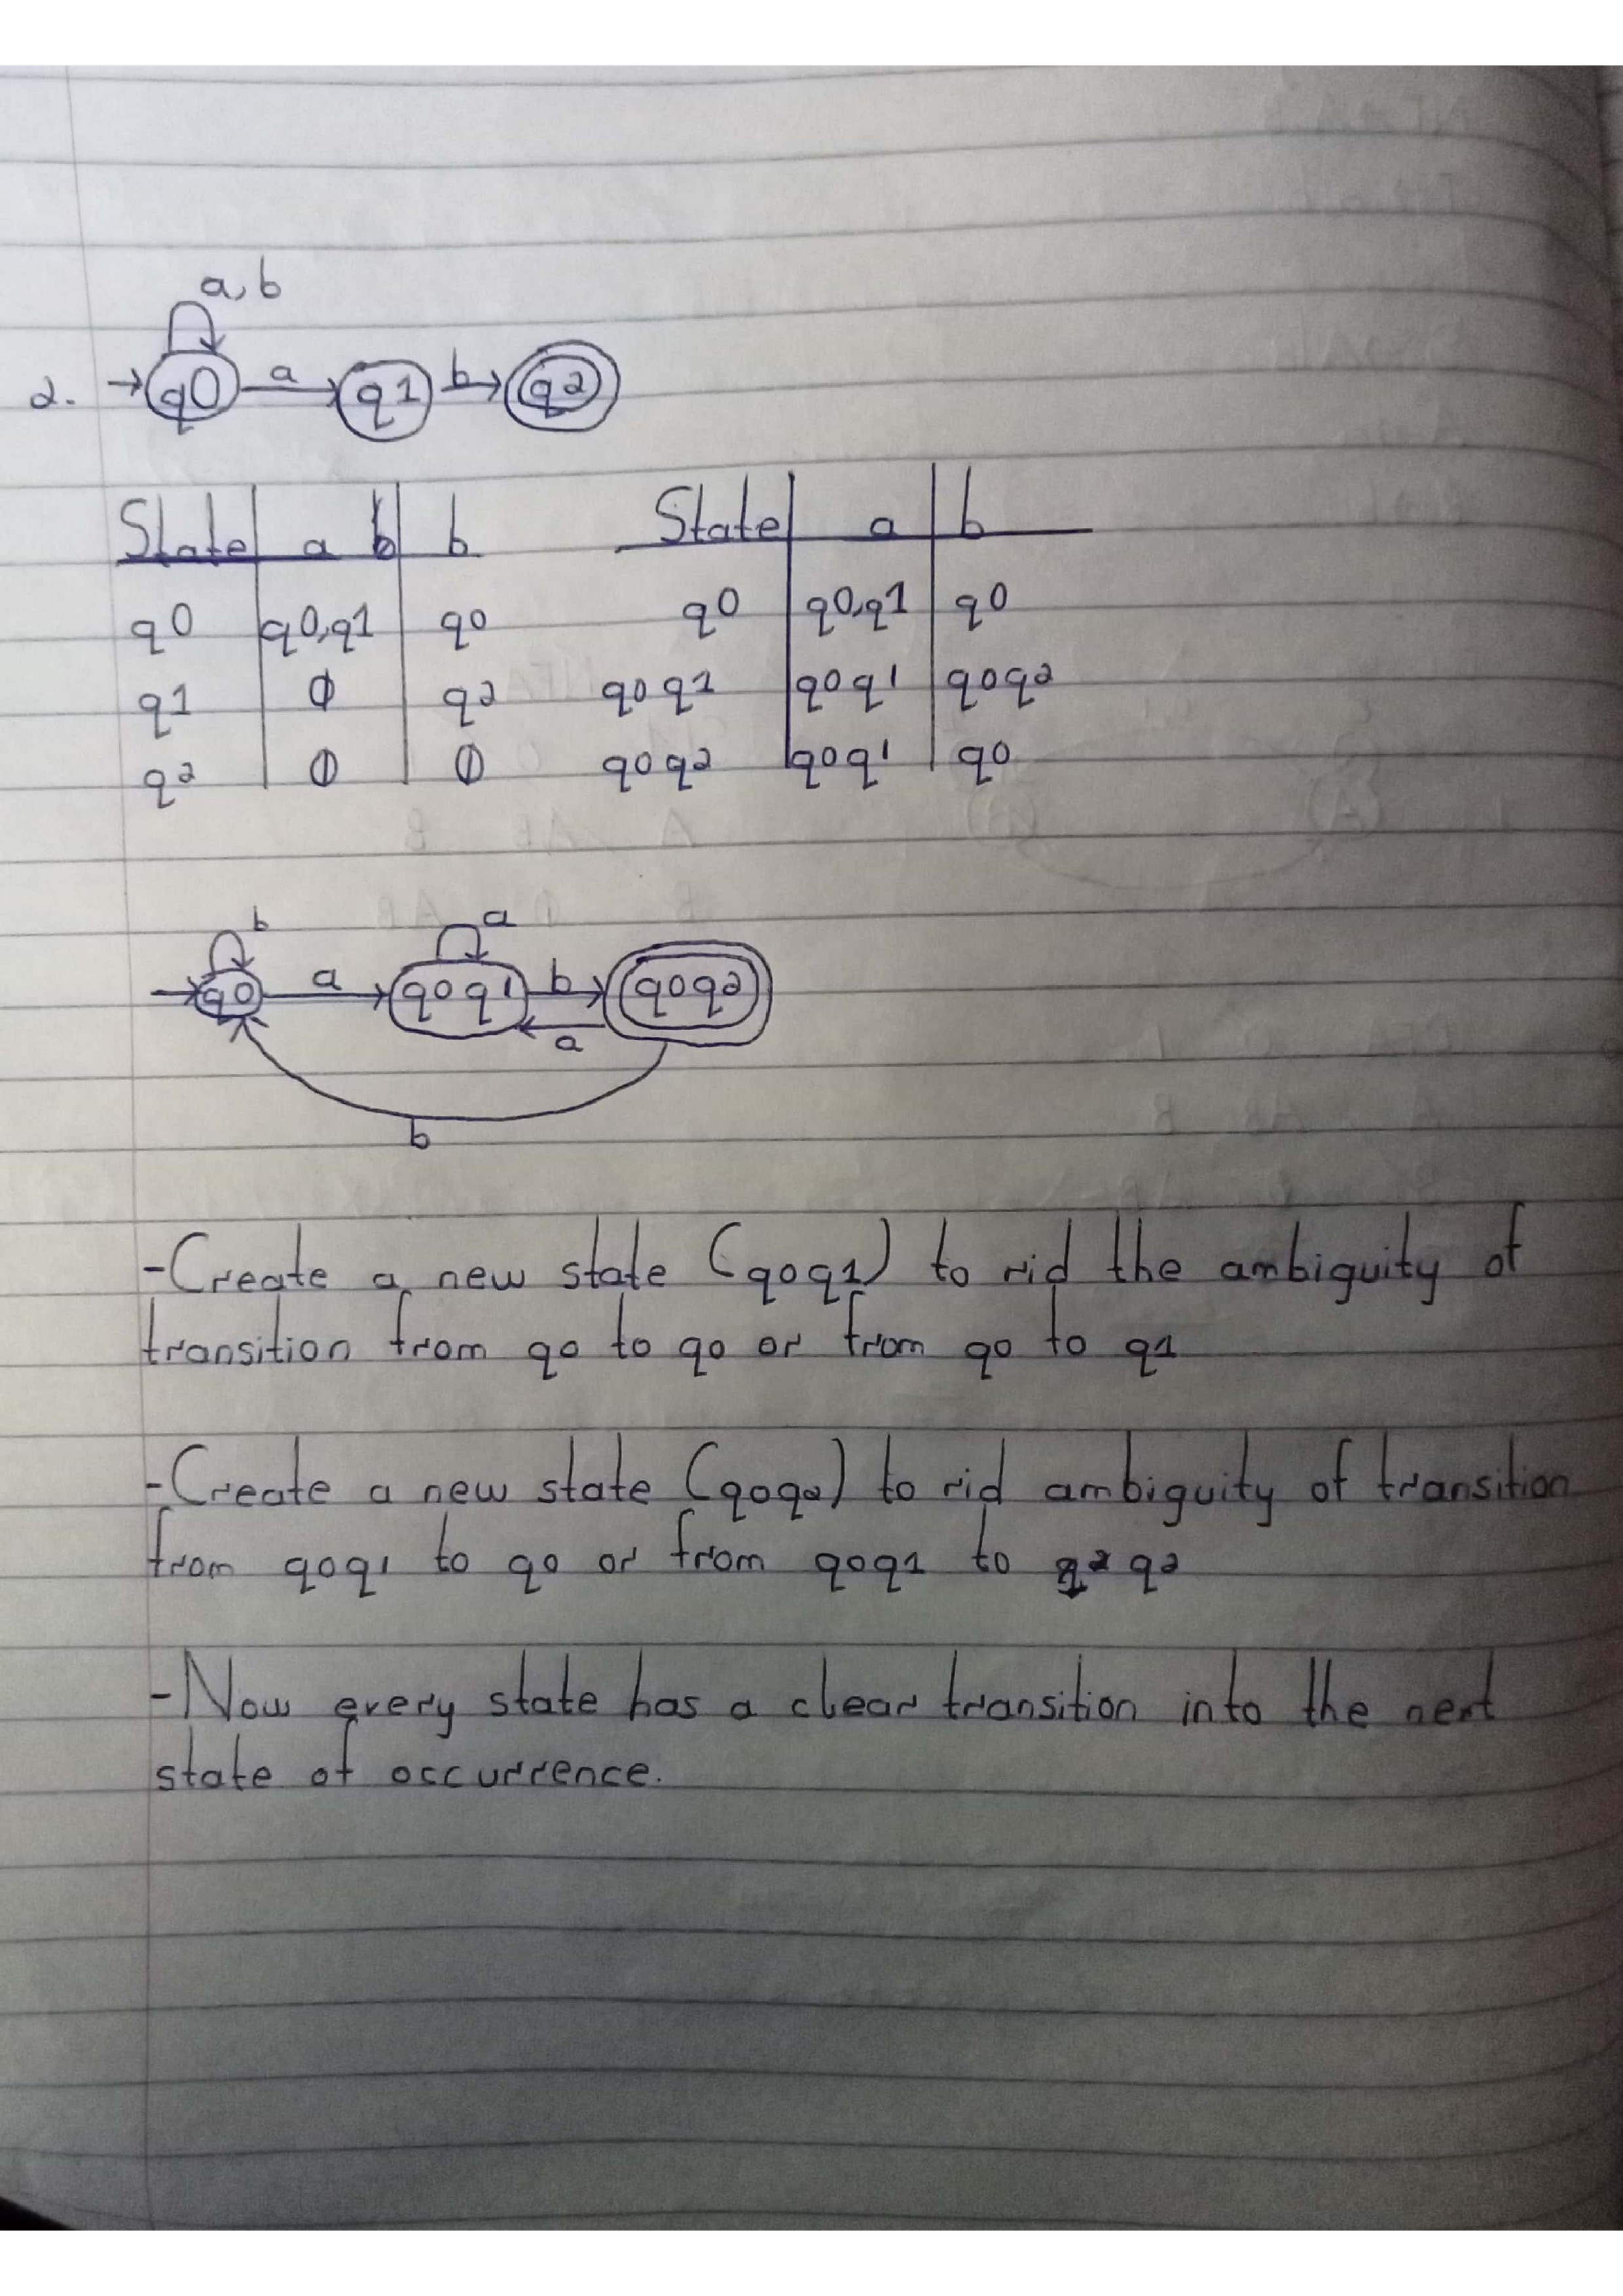

## **LAB ACTIVITY 3 : SIMPLE FLEX LEXER**

Develop a simple lexer using flex:

The code below is a simple lexer that receives a number as input and matches even and odd numbers as well as counts the total number of even and odd numbers.

In [ ]:
# DEFINITION SECTION
%{
    int even = 0;
    int odd = 0;
%}

# RULE SECTION
# RULE 1: Matches with even numbers
# RULE 2: Matches with odd numbers

%%
[2468]  {printf("%s EVEN\n", yytext);
         even++;}
[13579] {printf("%s ODD\n", yytext);
         odd++;}
%%

# CODE SECTION
int yywrap(){}
int main(){
    yylex();
    printf("\nNumber of even numbers - %d\n", even);
    printf("\nNumber of odd numbers - %d\n", odd);
    return 0;
}

#### OUTPUT:

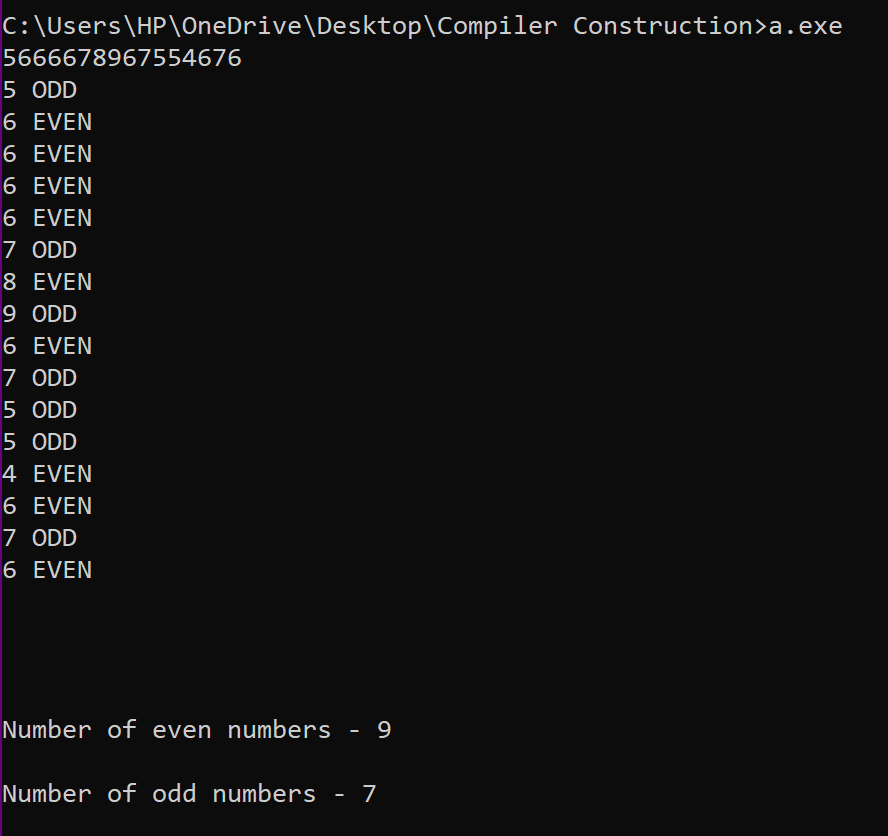

## **Lab Activity 4 (Understanding Predictive Parsing)**

### **1. Using an example or illustration, explain what is predictive parsing**

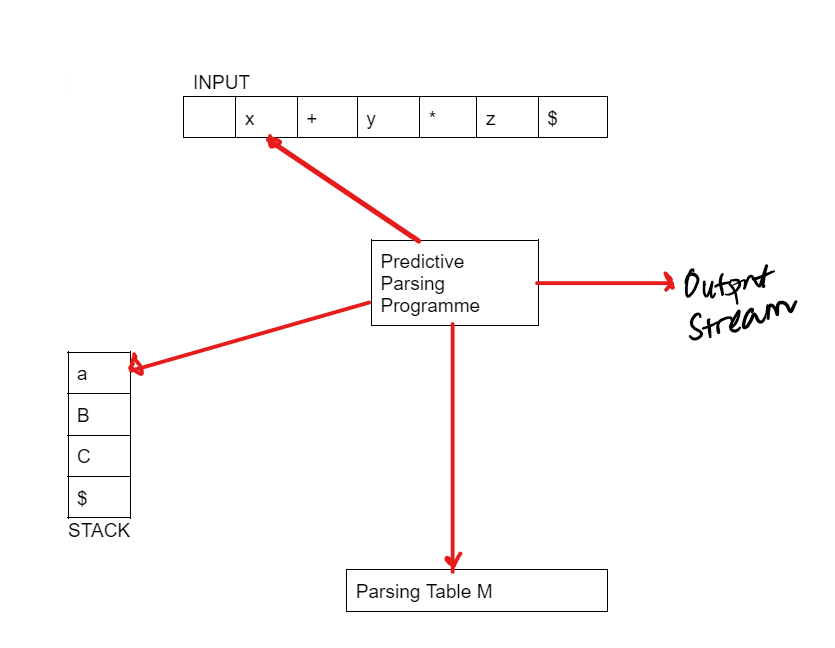

Predictive parsing is a form of recursive descent parsing, where no backtracking is required. It relies on information about what first symbols can be generated by the right side of a production.


Non-recursive predictive parsing or table-driven parsing is also known as LL(1) parser. The purser follows the left-most derivation.

### **2a. What is LL (1) parsing?**


LL(1) parsing is a top-down parsing method in the syntax analysis phase of compiler design.  Required components for LL(1) parsing are input string, a stack, parsing table for given grammar, and parser. Here, we discuss a parser that determines that given string can be generated from a given grammar(or parsing table) or not.
 Let given grammar is G = (V, T, S, P)
where V-variable symbol set, T-terminal symbol set, S- start symbol, P- production set. 

The first L indicates that the input is read from left to right. 


The second L says that it produces a left-to-right derivation. 


And the 1 says that it uses one lookahead token. (Some parsers look ahead at the next 2 tokens, or even more than that.) 

### **2b. Why do we get the First () and Follow () i.e. what do these two functions Really Represent?**

We need to find FIRST and FOLLOW sets for a given grammar so that the parser can properly apply the needed rule at the correct position. 

These Functions help us fill in the entries of an LL (1) table. 

We use First in order for the parser to  wisely apply the correct production rule to get the correct syntax tree for the given input string.

We use Follow to make a Non-terminal vanish out if needed to generate the string from the parse tree.

### **3. Are there any unique attributes associated with Top-Down parsing?**



*  It is a technique that uses left most derivation.
*  Top-down parsing starts at the highest level of the parse tree and works its way down to the bottom.
*   It is not a complicated technique.





## **Lab Activity 5 (Syntax Analysis)**

### **1. What is syntax analysis and what does is entail?**

Syntax analysis checks whether the given input is in the correct syntax with reference to a pre-defined grammar.
It involves a process known as derivation by building data structures such as parse trees; if the input can be completely derived using the parse tree with reference to the predefined grammar then it is considered of correct syntax. 

### **2.Developing a simple synatx analyzer using flex and bison.**

In syntax analysis, the flex and bison files work together.
The flex file contains instructions for lexical analysis while the bison file contains instructions for syntax analysis.

##### ***(See the code blocks below for the following explanation)***
**What happens in the flex file:**


*   It recognizes a number -> 0 to 9
*   It passes the number to the bison file (parser)
*   Detects a new line, recognizing an End of Line (EOL).

**What happens in the bison file:**


*  Has some rules which represent the grammar i.e. input, line and exp.
*   The input could be nothing or a line.
*   The line can be an expression followed by an EOL or just an EOL 
*   An expression can be a number or an exp plus another exp.
* Double dollar signs represent an output i.e **$$ = $1;** means that the output should be the first input.
*   Addition of 2 numbers will give the sum as the output.

**Extra Points:**
*   Since the 2 files are working together, the parser has to be included in the lexer file.
*   atoi() function is used to convert a character string into an integer.
*   yywrap() is called once the input is exhausted.
*   yyparse() returns a 0 if the syntax of the input is correct and a 1 if the syntax is not correct.
















Flex File:

In [ ]:
%{
    #include "parser.tab.h"
%}

%%

[0-9]+ {yylval.num = atoi(yytext); return NUMBER;  }
"+" {return PLUS;}
\n {return EOL;}
. {}

%%

yywrap() {}


Bison File:

In [ ]:
%{
    
%}

%union {
    int num;
    char sym;
}

%token EOL
%token<num> NUMBER
%token<num> exp
%token PLUS

%%
input: | line input
line: exp EOL {printf("%d\n", $1);} | EOL;
exp: NUMBER{$$ = $1;} | exp PLUS exp{$$ = $1 + $3;};

%%


int main() {
    yyparse(); 

    return 0;
}

yyerror(char* s) {
    printf("ERROR: %s\n", s);

    return 0;
}

## **References:**

https://arcb.csc.ncsu.edu/~mueller/codeopt/codeopt00/y_man.pdf
http://www.cs.bilkent.edu.tr/~guvenir/courses/CS315/lex-yacc/lex-yacc.pdf
https://www.geeksforgeeks.org/yacc-program-to-implement-a-calculator-and-recognize-a-valid-arithmetic-expression/

Bison—Examples. (n.d.). Retrieved September 8, 2022, from http://web.mit.edu/gnu/doc/html/bison_5.html
Gao. (n.d.). Bison Tutorial. Retrieved September 8, 2022, from http://alumni.cs.ucr.edu/~lgao/teaching/bison.html
Johnson, M. (2012, July 9). Introduction to Bison. https://web.stanford.edu/class/archive/cs/cs143/cs143.1128/handouts/120%20Introducing%20bison.pdf

https://www.geeksforgeeks.org/flex-fast-lexical-analyzer-generator/

https://www.slideshare.net/SandipBasnet3/flex-fast-lexical-analyzer-generator

Levine, J. R., & Levine, J. R. (2009). Flex & bison (1st ed). O’Reilly.

Levine, J. R., Mason, T., & Brown, D. (1997). Lex & yacc (2. ed., minor corr). O’Reilly.

https://www.geeksforgeeks.org/ll1-parsing-algorithm/

http://www.cs.ecu.edu/karl/5220/spr16/Notes/Top-down/LL1.html

https://www.geeksforgeeks.org/why-first-and-follow-in-compiler-design/